# Amazon Captcha Solver

### Importing librairies

In [1]:
import glob
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Input, Concatenate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
training_captchas = glob.glob('datasets/train_data/*')
testing_captchas = glob.glob('datasets/test_data/*')

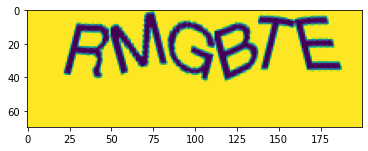

In [3]:
captcha_sample = plt.imread(training_captchas[0])
plt.imshow(captcha_sample)
plt.show()

### Transforming and reducing the size of the files

In [4]:
letters  = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [5]:
len(letters) # Make sure we don't forget a letter ^^

26

#### Building functionm to show multiple images om jupyter notebook

In [6]:
def show_image(image, read_from_path=False):
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
        read_from_path: chose to show image from file path instead of from data (default False)
    """
    if read_from_path:
        image = mpimg.imread(image)
    plt.figure()
    plt.imshow(image)

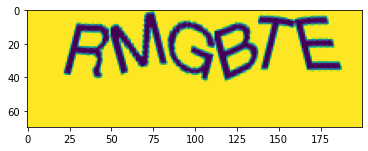

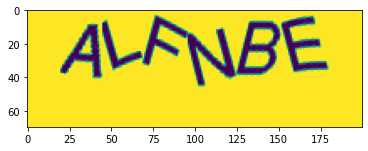

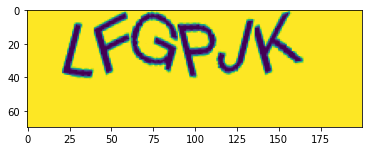

In [7]:
for i in range(len(training_captchas)):
    if i == 3:
        break
    show_image(training_captchas[i], True)
    i += 1

### Set up datasets for modeling

In [8]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for dataset in [training_captchas, testing_captchas]:
    for n in range(len(dataset)):
        data = plt.imread(dataset[n])
        # Crop out common white spaces
        data = data[:42, 22:184]
        captcha_letters = []
        captcha_letters.append(data[:,:37])
        captcha_letters.append(data[:,17:54])
        captcha_letters.append(data[:,44:81])
        captcha_letters.append(data[:,71:108])
        captcha_letters.append(data[:,98:135])
        captcha_letters.append(data[:,125:])
        captcha_letters_names = list(dataset[n].split("/")[2].replace(".jpg", ""))
        for j in range(6):
            if dataset == training_captchas:
                train_data.append(captcha_letters[j])
                train_labels.append(captcha_letters_names[j])
            else:
                test_data.append(captcha_letters[j])
                test_labels.append(captcha_letters_names[j])

In [9]:
len(train_data)

4782

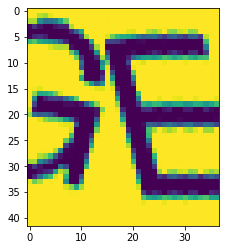

In [10]:
show_image(train_data[3845])

In [11]:
train_labels[3845]

'E'

### Transforming Characters into integers

In [13]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [17]:
# train_data.shape
# train_labels.shape
# test_data.shape
test_labels.shape

(516,)

### Modeling